In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [6]:
df = pd.read_csv(r'C:\Users\scrap\OneDrive\Desktop\vgsales_cleaned.csv', index_col = False)

In [20]:
df.head()

,Unnamed: 0,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,4,5,1996.0,11.27,8.89,10.22,1.00,31.37


In [11]:
df.columns = ['Unnamed: 0', 'Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [19]:
df.drop(columns=['Platform', 'Genre', 'Publisher'], inplace=True)

In [27]:
df.isnull()

,Unnamed: 0,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False


In [21]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [40]:
df.dropna(inplace=True)

In [41]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

C:\Users\scrap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scrap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scrap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scrap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-749963002179.565,
 -187489758056.0468,
 -83290758496.46907,
 -46891584199.64363,
 -30026601658.253407,
 -20851454672.939407,
 -15301644170.797789,
 -11713337169.99853,
 -9268200698.08999]

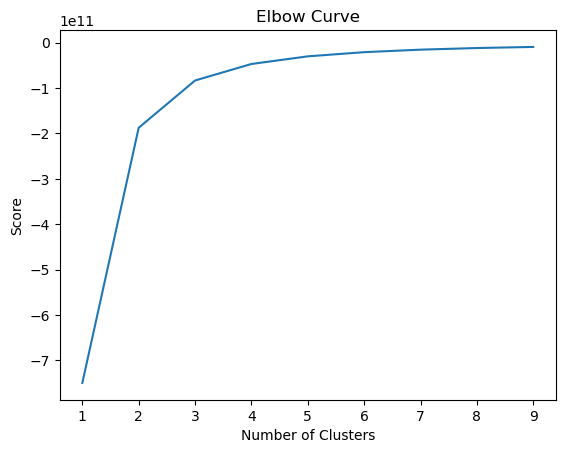

In [42]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [43]:
#Im going to choose to use 4 clusters, I feel as though it is a good enough number to display data in a concise way instead of overflowing the data set with a bunch of information. Also since there is a significant jump from 2 to 4 I believe I can use this number to correctly display everything.

In [44]:
kmeans = KMeans(n_clusters = 4) 

In [45]:
kmeans.fit(df)

C:\Users\scrap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [46]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\scrap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
df.head()

,Unnamed: 0,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,clusters
0,0,1,2006.0,41.49,29.02,3.77,8.46,82.74,1
1,1,2,1985.0,29.08,3.58,6.81,0.77,40.24,1
2,2,3,2008.0,15.85,12.88,3.79,3.31,35.82,1
3,3,4,2009.0,15.75,11.01,3.28,2.96,33.00,1
4,4,5,1996.0,11.27,8.89,10.22,1.00,31.37,1


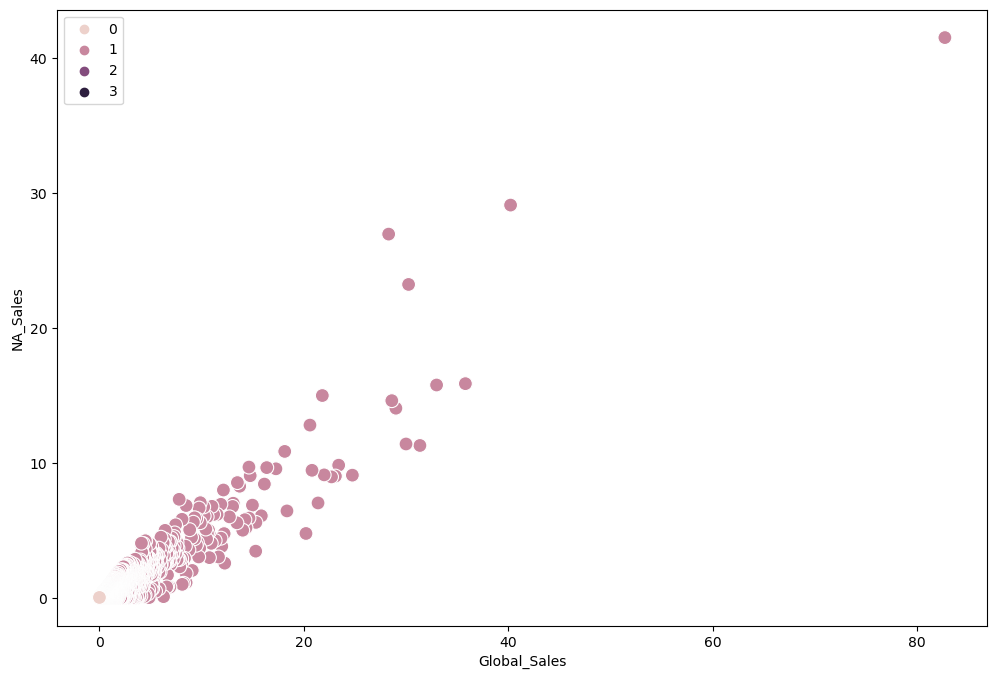

In [51]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Global_Sales'], y=df['NA_Sales'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Global_Sales') 
plt.ylabel('NA_Sales') 
plt.show()

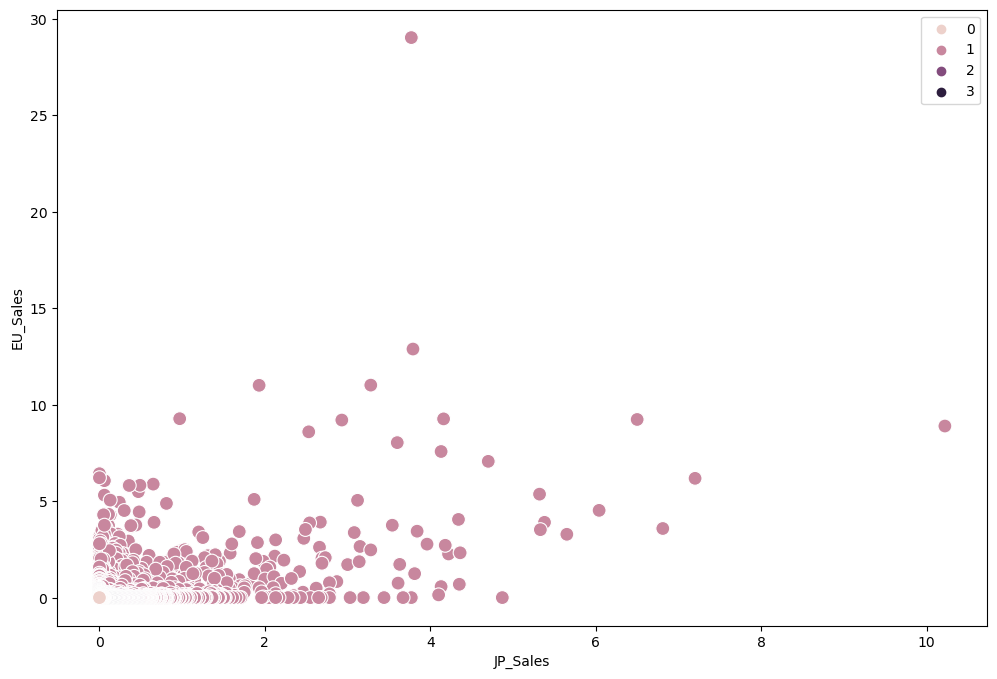

In [57]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['JP_Sales'], y=df['EU_Sales'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('JP_Sales') 
plt.ylabel('EU_Sales') 
plt.show()

In [53]:
#I can see that there are a few outliers from the columns i decided to use. But there is also quite a bit of zero's in the columns that i used, this information is still useful because it shows us where we are struggling the most.

In [55]:
df.loc[df['clusters'] == 3, 'cluster'] = 'yellow'
df.loc[df['clusters'] == 2, 'cluster'] = 'turquoise'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'black'

In [56]:
df.groupby('cluster').agg({'Global_Sales':['mean', 'median'], 
                         'NA_Sales':['mean', 'median'], 
                         'JP_Sales':['mean', 'median'],
                          'EU_Sales':['mean', 'median']})

Global_Sales         NA_Sales         JP_Sales         EU_Sales  \
                  mean median      mean median      mean median      mean   
cluster                                                                     
black         0.031893   0.03  0.010977   0.00  0.011925    0.0  0.006941   
purple        1.723673   1.00  0.844837   0.50  0.221426    0.0  0.496050   
turquoise     0.294094   0.28  0.149323   0.15  0.054904    0.0  0.066310   
yellow        0.109505   0.11  0.055697   0.06  0.026221    0.0  0.020331   

                  
          median  
cluster           
black       0.00  
purple      0.27  
turquoise   0.05  
yellow      0.01

In [58]:
#These results can show us future aspects of our sales. If I added the year column we could've predicted how further years could look. My objective for this particular exercise was to see how the different regions compared to each other in terms of sales and it seems that Global and NA are the top 2 contenders.